In [13]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)

In [14]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt 

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
def plot_datas(X , n_clusters=4, rseed=0, ax=None , c=y_true ):
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=c, s=40, cmap='viridis', zorder=2)
    

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

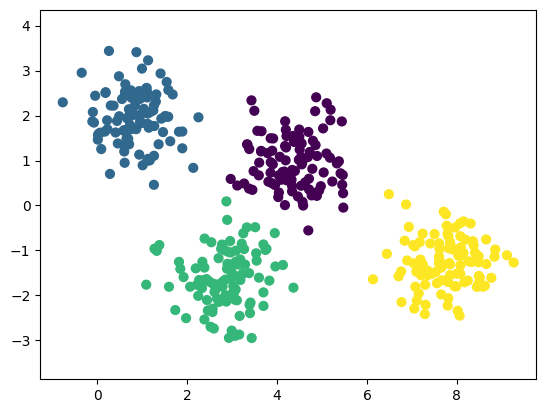

In [15]:
plot_datas(X)

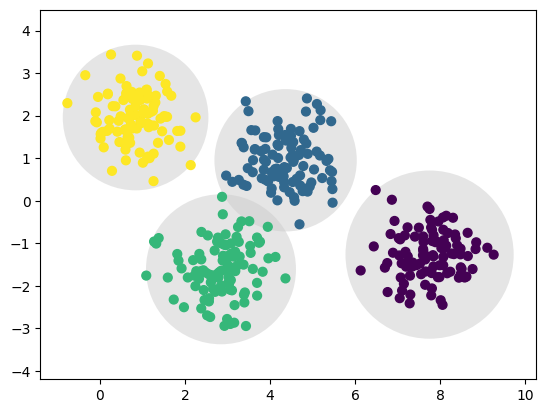

In [16]:
plot_kmeans(kmeans, X)

In [17]:
import numpy as np
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

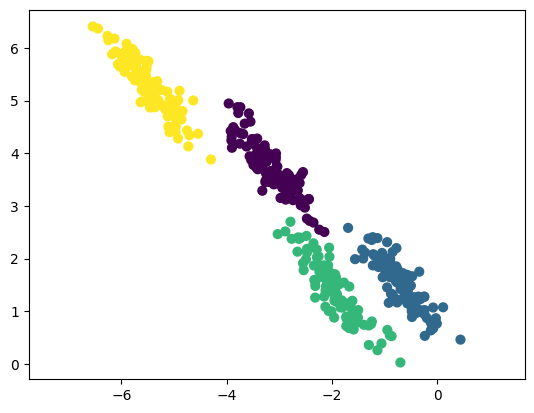

In [18]:
plot_datas(X_stretched)

In [19]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_stretched)
labels = kmeans.predict(X_stretched)

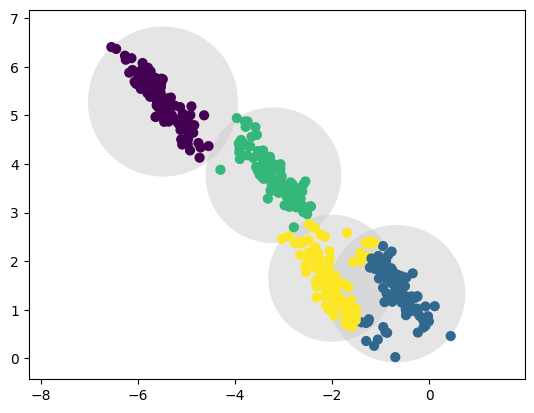

In [20]:
plot_kmeans(kmeans, X_stretched)

#### sklearn.mixture.GaussianMixture
- class sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)

In [41]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4 , random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

In [42]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, width = nsig * width, height = nsig * height,
                             angle = angle))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        print(pos)
        draw_ellipse(pos, covar)

[ 7.76207921 -1.27617979]
[4.36450124 0.93400014]
[ 2.84520475 -1.62515249]
[0.8377989  1.95781368]


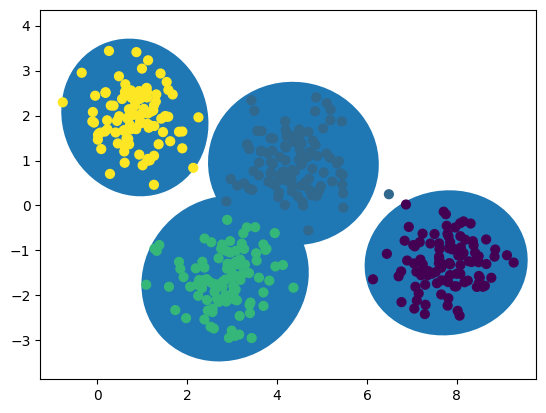

In [47]:
plot_gmm(gmm ,X )

In [54]:
gmm = GaussianMixture(n_components=4 , random_state=0)
gmm.fit(X_stretched)
labels = gmm.predict(X_stretched)

[-5.47367983  5.27447146]
[-0.68376966  1.5159382 ]
[-3.15153404  3.71212911]
[-1.95441227  1.40990706]


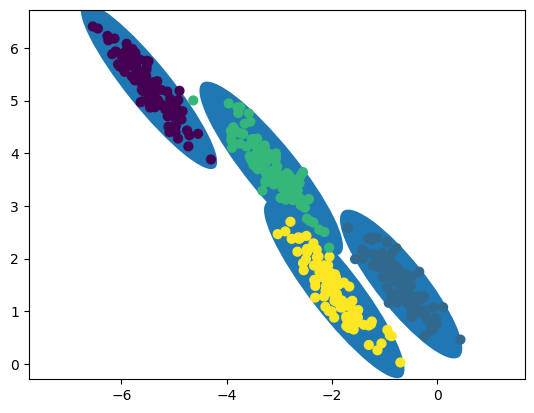

In [55]:
plot_gmm(gmm ,X_stretched )

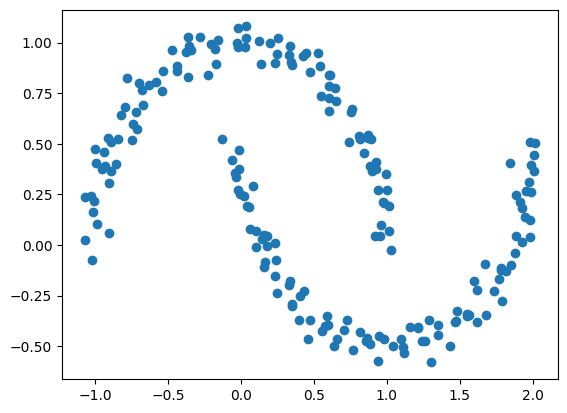

In [56]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

In [57]:
ymoon

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [58]:
gmm = GaussianMixture(n_components=2 , random_state=0)
gmm.fit(Xmoon)
labels = gmm.predict(Xmoon)

[-0.14655377  0.63648337]
[ 1.13342753 -0.12841187]


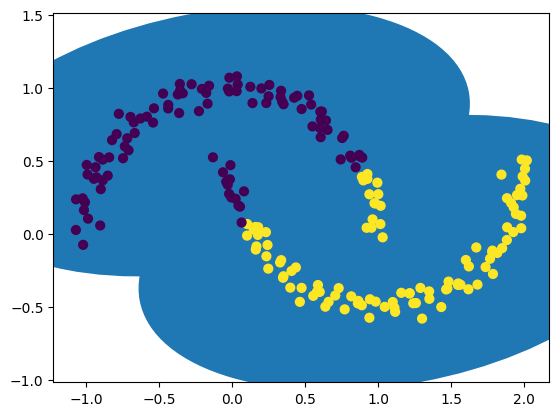

In [59]:
plot_gmm(gmm,Xmoon)